In [165]:
import pandas as pd
import matplotlib.pyplot as plt

In [166]:
corpus_file = "../../data/democracy_reports_corpus_merged_predictions_120624.csv"
df = pd.read_csv(corpus_file)

/var/folders/pj/wj7m849s68qcg6_lr0j03jgh0000gn/T/ipykernel_63962/2466706165.py:2: DtypeWarning: Columns (4,5,6,8,9,10,12,13,14,17,18,19,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(corpus_file)


In [167]:
# fix some stuff
#unique_countries = df['country'].unique()
#print("Unique countries:", unique_countries)
# replace czech-republic with czechia
df['country'] = df['country'].replace({'czech-republic':'czechia'})
unique_countries = df['country'].unique()
print("Unique countries:", unique_countries)

#unique_sources = df['source'].unique()
#print("Unique source:", unique_sources)
# replace typos from previous processing
df['source'] = df['source'].replace({'eu_rule_of_law"':'eu_rule_of_law', 'bti"':'bti', 'freedomhouse_freedom-net"':'freedomhouse_freedom-net', 'freedomhouse_nations-transit"':'freedomhouse_nations-transit','freedomhouse_freedom-world"':'freedomhouse_freedom-world',' bti"':'bti', 'greco"':'greco', 'freedomhouse_nations-transitnal capacity and financial sustainability of the civic sector"':'freedomhouse_nations-transit'})
unique_sources = df['source'].unique()
print("Unique source:", unique_sources)

unique_years = df['year'].unique()
print('Years: ', unique_years)

Unique countries: ['turkey' 'spain' 'germany' 'slovenia' 'greece' 'kosovo' 'armenia'
 'serbia' 'azerbaijan' 'georgia' 'andorra' 'ukraine' 'luxembourg'
 'finland' 'iceland' 'bulgaria' 'bosnia-herzegovina' 'netherlands'
 'ireland' 'denmark' 'austria' 'montenegro' 'sweden' 'slovakia'
 'switzerland' 'norway' 'poland' 'croatia' 'moldova' 'liechtenstein'
 'latvia' 'san-marino' 'russia' 'france' 'czechia' 'united-kingdom'
 'albania' 'belarus' 'lithuania' 'malta' 'cyprus' 'estonia'
 'north-macedonia' 'belgium' 'hungary' 'romania' 'portugal'
 'serbia-montenegro' 'italy' 'monaco']
Unique source: ['freedomhouse_freedom-world' 'freedomhouse_nations-transit'
 'freedomhouse_freedom-net' 'bti' 'greco' 'eu_rule_of_law']
Years:  [2021 2018 2019 2022 2023 2020 2016 2015 2017 2006 2012 2008 2003 2010
 2014 2013 2002 2009 2007 2004 2001 2005 2011 2000]


In [168]:
print(df.sample(1))

                                                sentence  country  year  \
78849  "In May 2021, Ara Saghatelyan reported that th...  armenia  2022   

                         source dimension1_r1 dimension2_r1 backsliding_r1  \
78849  freedomhouse_freedom-net           NaN           NaN            NaN   

       start_idea_r1 dimension0_r2 dimension1_r2  ... dimension2_r3  \
78849            NaN           NaN           NaN  ...           NaN   

       backsliding_r3 start_idea_r2 start_idea_r3 dimension0_r1  \
78849             NaN           NaN           NaN           NaN   

       correct_dimension  expalained_ambiquous Unnamed: 21 dimension0  \
78849                NaN                   NaN         NaN        NaN   

      predicted_class_roberta  
78849               ambiguous  

[1 rows x 24 columns]


In [169]:
def plot_2Cols(df, x_col_name, y_col_name, normalized=False, figsize=(12,8)):
    plot_data = None
    count_data = df.groupby([x_col_name, y_col_name]).size().unstack(fill_value=0)
    
    if normalized:        
        # Normalize the counts by dividing by the total count for each country
        plot_data = count_data.div(count_data.sum(axis=1), axis=0)        
    else:
        plot_data = count_data
    
    # Plotting the data
    fig, ax = plt.subplots(figsize=figsize)
    #plot_data.plot(kind='bar', x=x_col_name, y=y_col_name, stacked=True)
    plot_data.plot(kind='bar', ax=ax, stacked=True)
    ax.set_xlabel(x_col_name)
    ax.set_ylabel(y_col_name)
    if normalized:
        ax.set_title(f'normalized: {y_col_name} vs {x_col_name}')
    else:
        ax.set_title(f'{y_col_name} vs {x_col_name}')
    #plt.legend(title='Predictions')
    ax.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
    return ax

In [178]:
def plot_3Cols(df, x_col_name, y_col_name, z_col_name, normalized=False, figsize=(12,8)):
    plot_data = None
    count_data = df.groupby([x_col_name, z_col_name, y_col_name]).size().unstack(fill_value=0)
    #count_data = df.groupby([x_col_name, y_col_name, z_col_name]).size().reset_index()

    # Plotting 3D bar plot
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(projection='3d')
    
    if normalized:        
        # Normalize the counts by dividing by the total count for each country
        plot_data = count_data.div(count_data.sum(axis=1), axis=0)        
    else:
        plot_data = count_data
        
    countries = count_data.index.get_level_values(x_col_name)
    sources = count_data.index.get_level_values(z_col_name)
    x_ticks = np.arange(len(countries))
    z_ticks = np.arange(len(sources))
    y_values = count_data.values.flatten()
    i = 0
    for c, s in zip(x_ticks, z_ticks):
        y_vals = count_data.values[i]
        print(y_vals)
        ax.bar(c, y_vals, zs=s, zdir='y', alpha=0.8)
        i += 1
        
  
    #fig, ax = plt.subplots(figsize=figsize)
    #plot_data.plot(kind='bar', x=x_col_name, y=y_col_name, stacked=True)
    #plot_data.plot(kind='line', ax=ax, stacked=True)
    #ax.scatter(plot_data[x_col_name], plot_data[y_col_name], plot_data[z_col_name], c='blue', marker='o')
    #ax.set_xlabel(x_col_name)
    #ax.set_ylabel(y_col_name)
    #ax.set_zlabel(z_col_name)
    #if normalized:
    #    ax.set_title(f'normalized: {y_col_name} vs {x_col_name}')
    #else:
    #    ax.set_title(f'{y_col_name} vs {x_col_name}')
    #plt.legend(title='Predictions')
    #ax.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
    return ax

In [179]:
y_col_name = "predicted_class_roberta"
x_col_name = "country"
z_col_name = "source"
#ax = plot_3Cols(df, x_col_name, y_col_name, z_col_name)

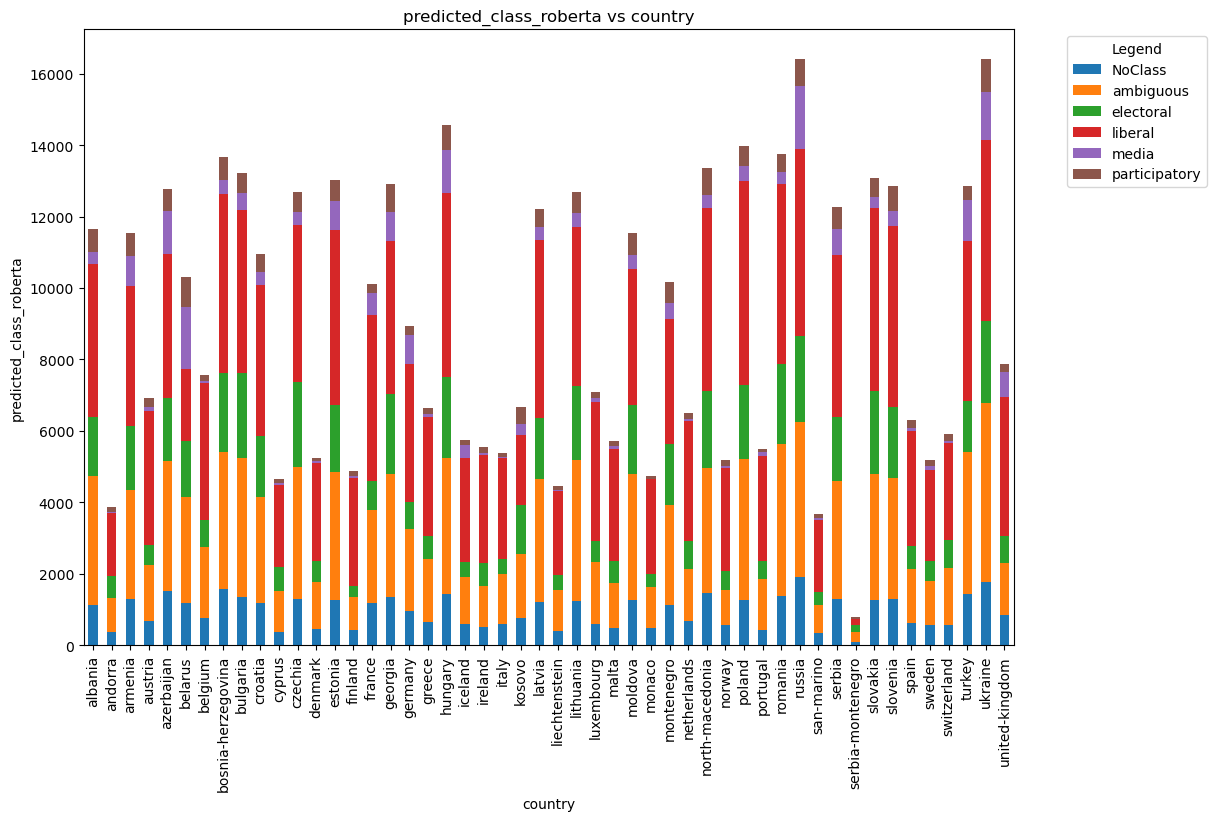

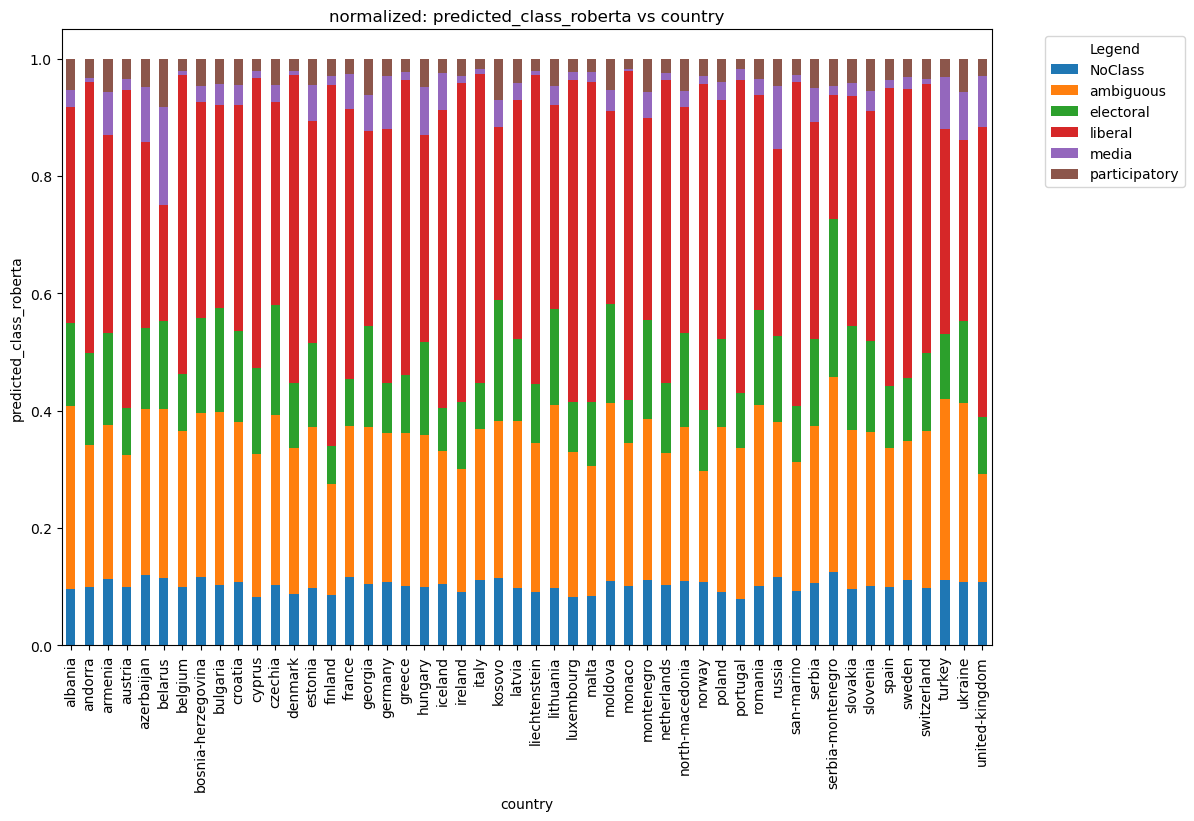

In [180]:
y_col_name = "predicted_class_roberta"
x_col_name = "country"
ax = plot_2Cols(df, x_col_name, y_col_name, False)
ax = plot_2Cols(df, x_col_name, y_col_name, True)


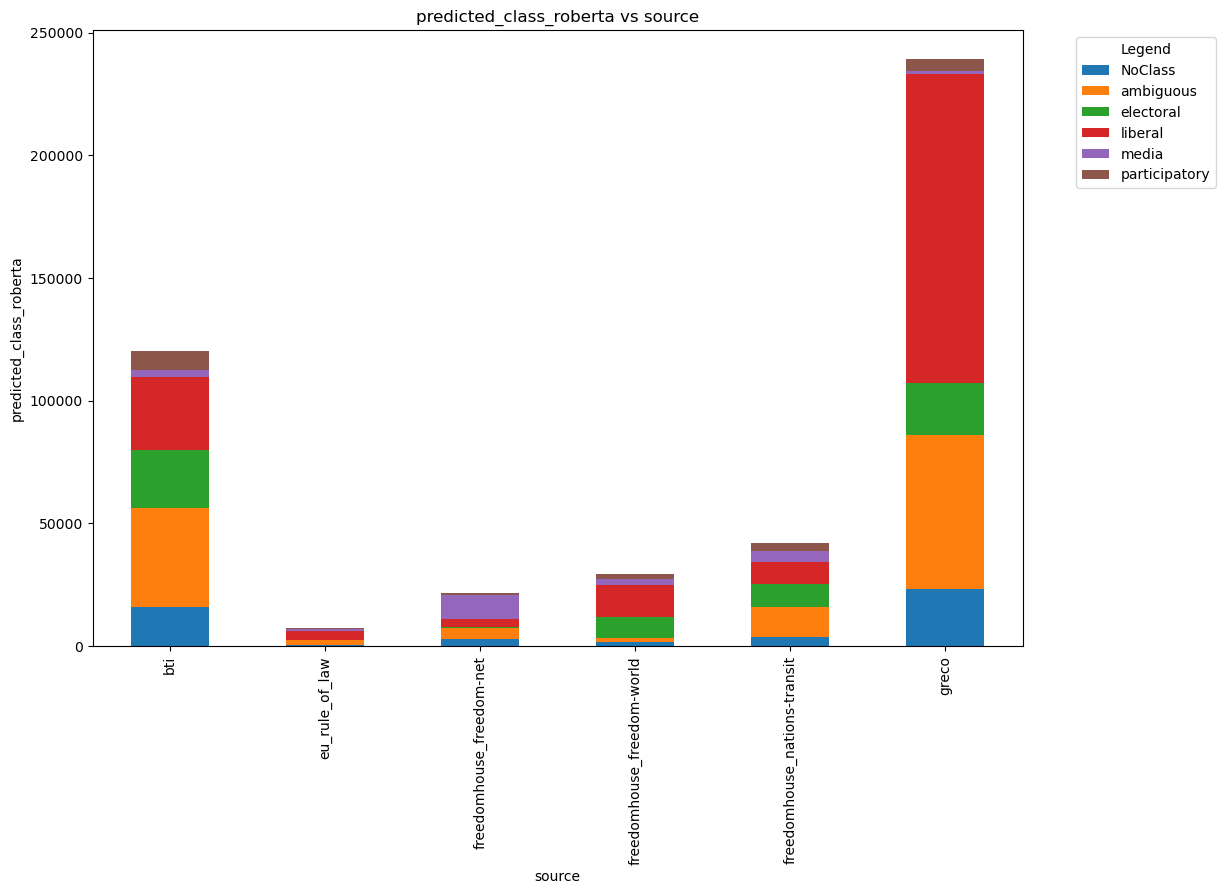

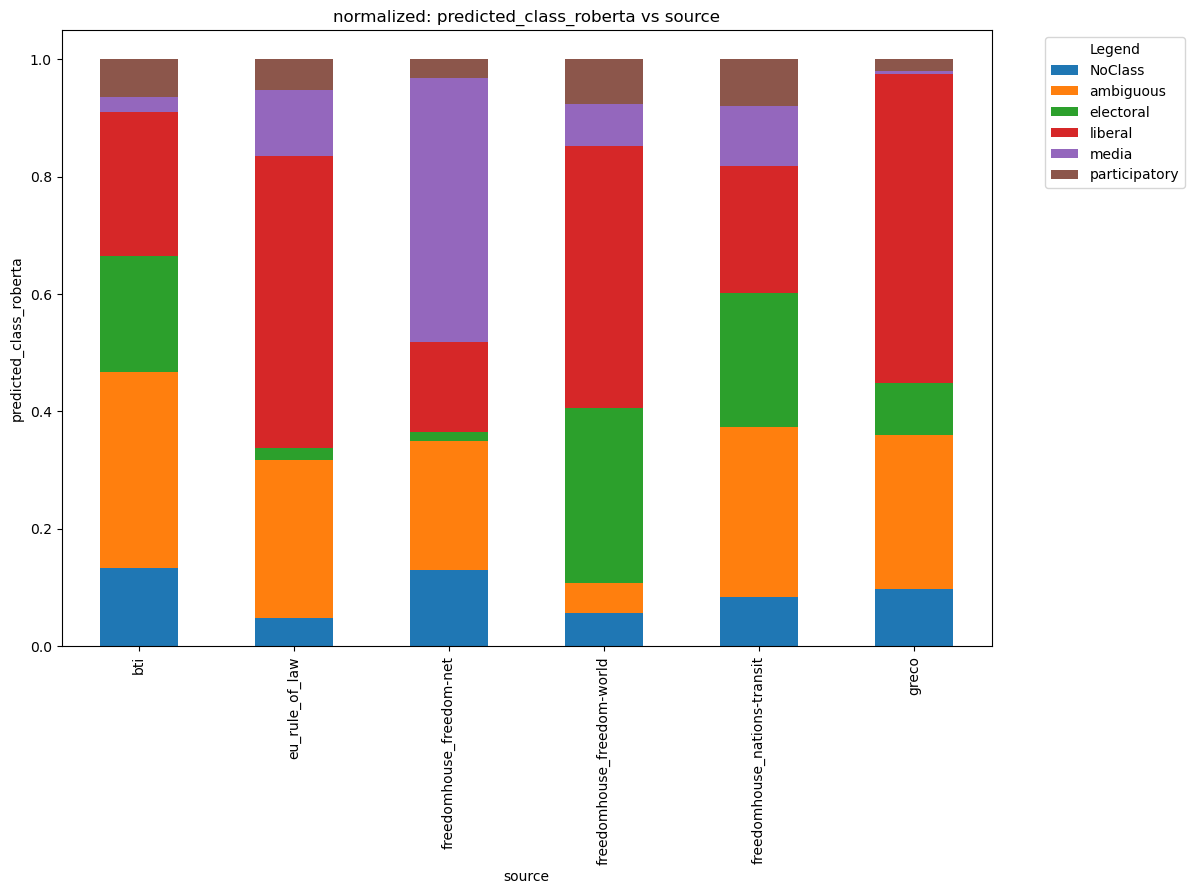

In [181]:
y_col_name = "predicted_class_roberta"
x_col_name = "source"
ax = plot_2Cols(df, x_col_name, y_col_name, False)
ax = plot_2Cols(df, x_col_name, y_col_name, True)

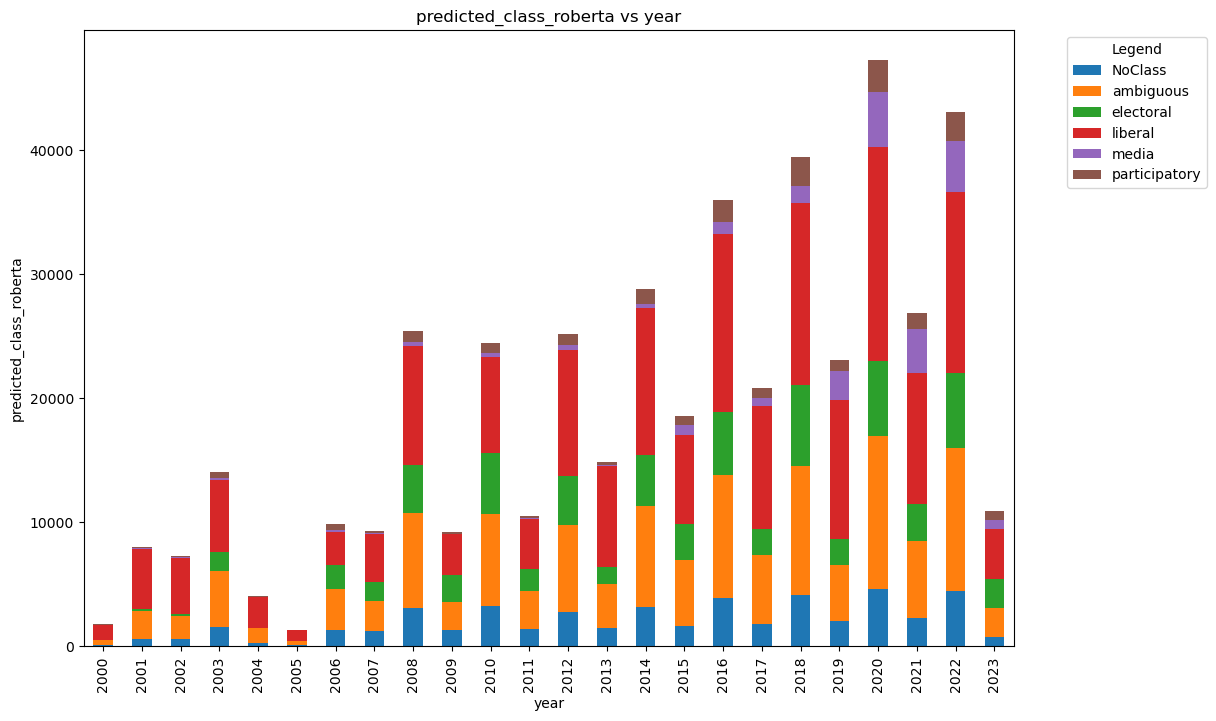

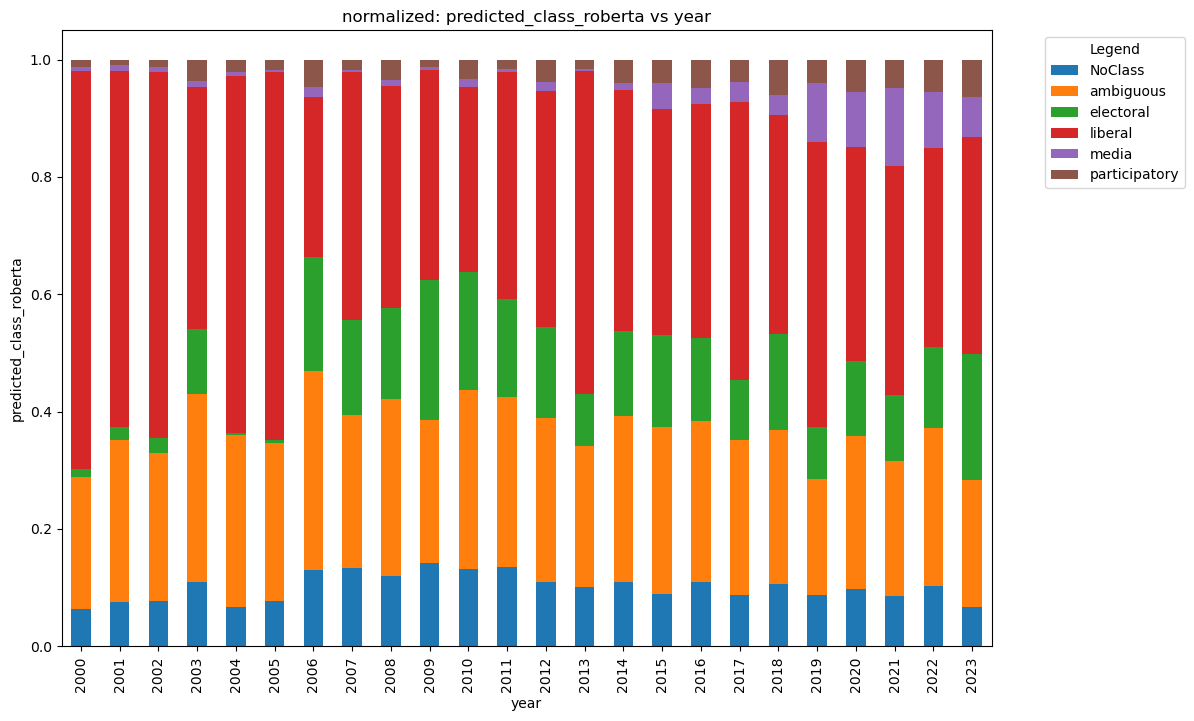

In [182]:
y_col_name = "predicted_class_roberta"
x_col_name = "year"
ax = plot_2Cols(df, x_col_name, y_col_name, False)
ax = plot_2Cols(df, x_col_name, y_col_name, True)

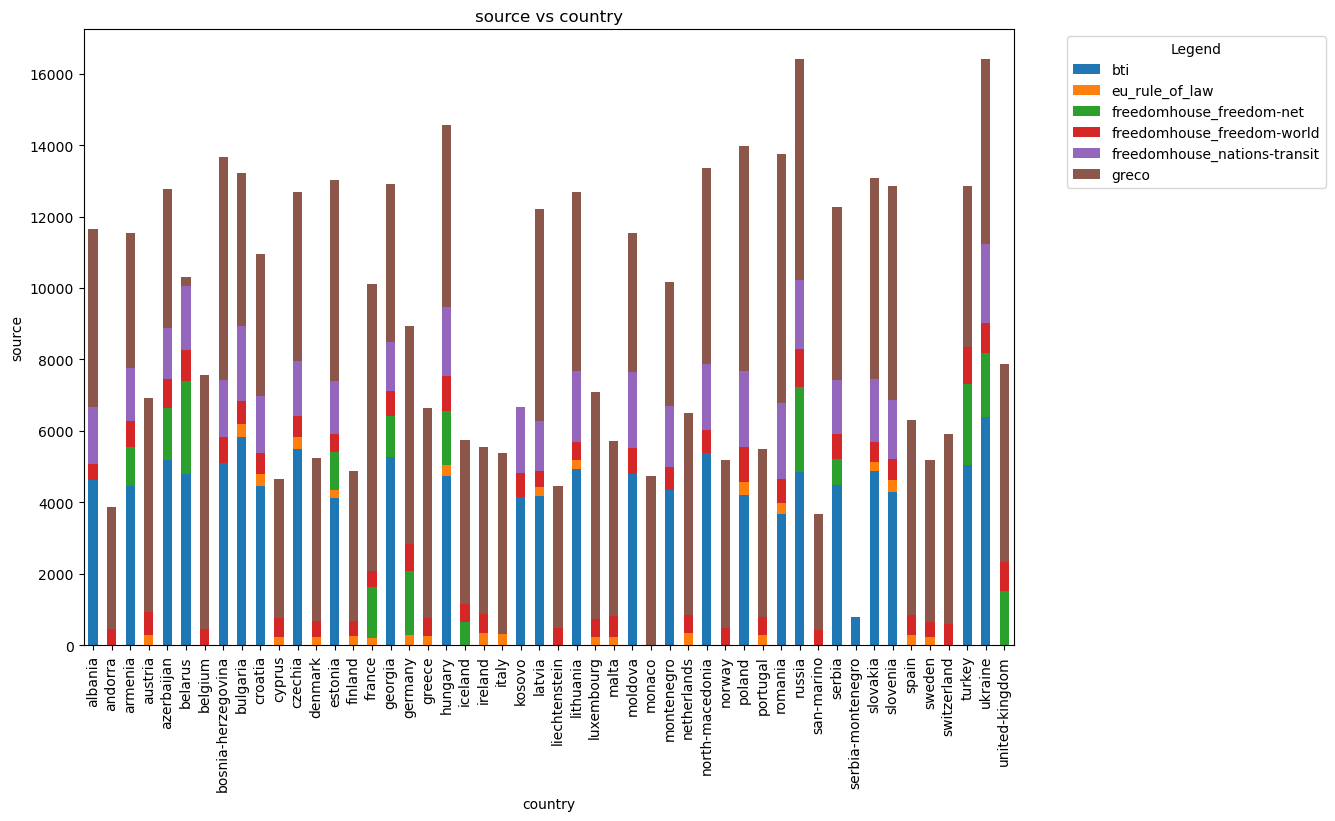

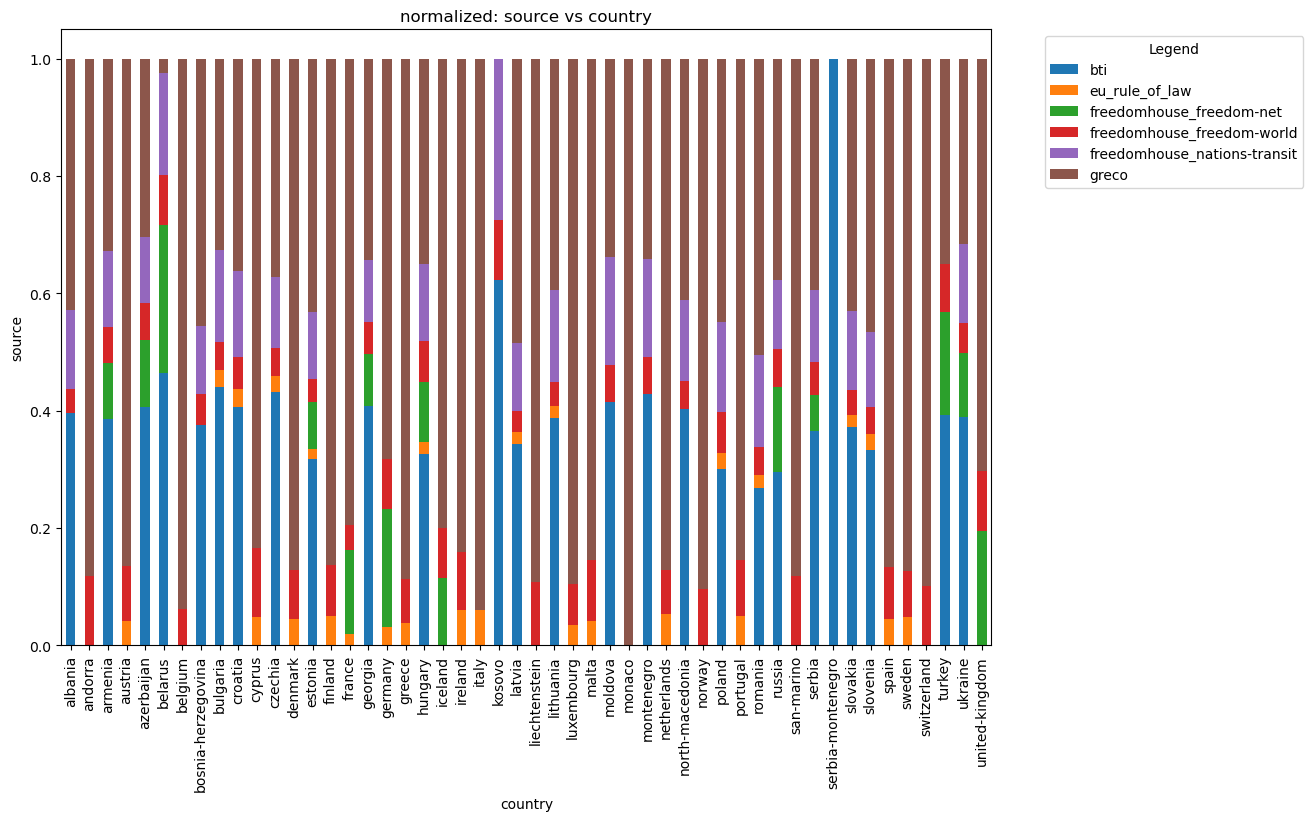

In [185]:
y_col_name = "source"
x_col_name = "country"
ax = plot_2Cols(df, x_col_name, y_col_name, False)
ax = plot_2Cols(df, x_col_name, y_col_name, True)

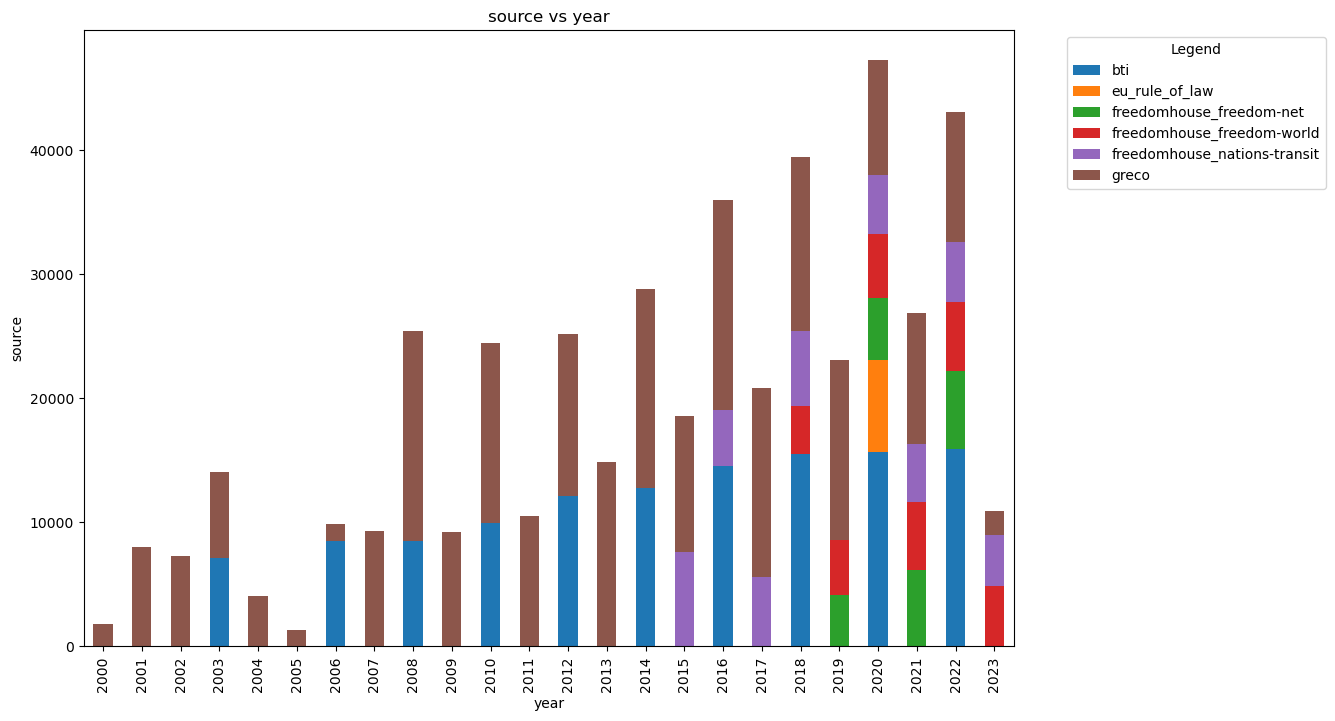

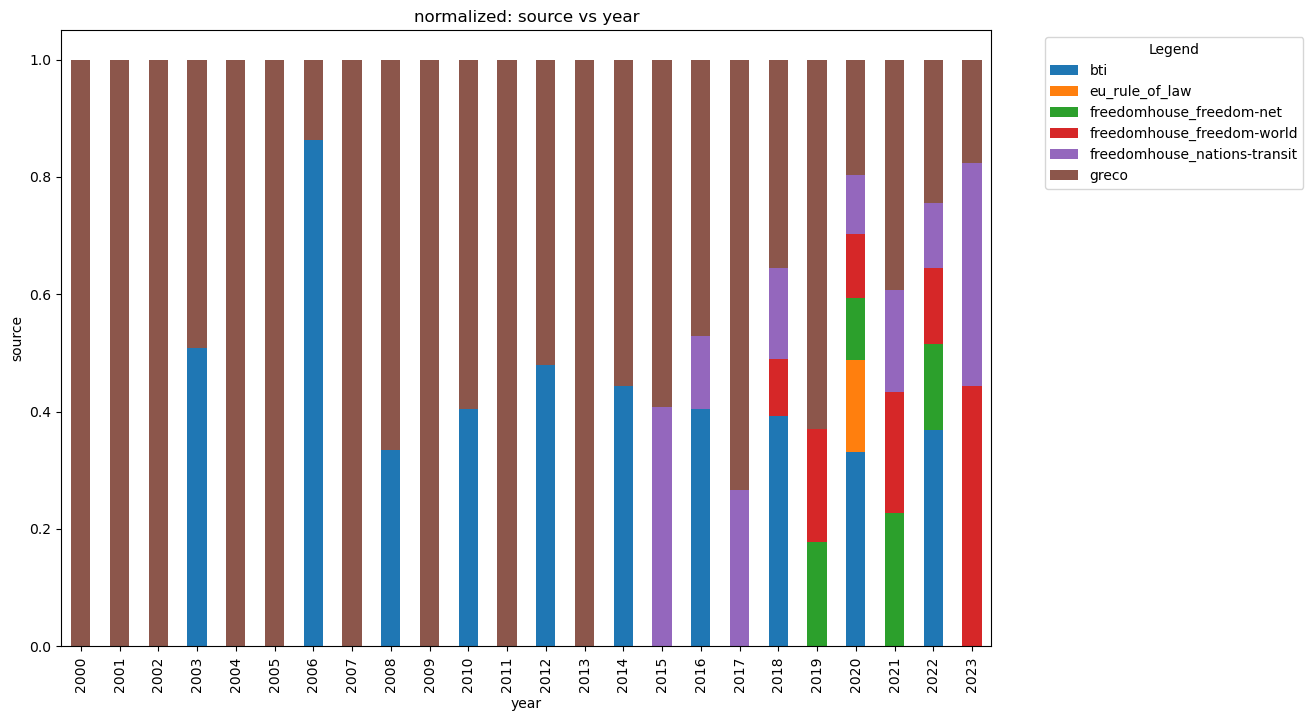

In [186]:
y_col_name = "source"
x_col_name = "year"
ax = plot_2Cols(df, x_col_name, y_col_name, False)
ax = plot_2Cols(df, x_col_name, y_col_name, True)